# Spectra differences

> Can Mid- and Near-infrared spectra reveal increasing concentration of K?

## Import 

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import fastcore.all as fc
from pathlib import Path
from sklearn.pipeline import Pipeline
import numpy as np

from spik.loading import load_mir, load_nir
from spik.preprocessing import MeanCenter, MeanReplicates, DWTFiltering, DiffFromUnspiked

In [ ]:
deep_blue, blue, orange, red = '#0571b0', '#92c5de', '#f4a582', '#ca0020'

## Utils

In [ ]:
def plot_spectra(X, wavenumbers, colors, labels, smp_name, 
                 xlabel='Wavenumbers', ylabel='Absorbance', 
                 spectra_type='MIR', figsize=(12, 5)):
    
    
    fig, ax = plt.subplots(figsize=figsize)
    
    X = X[:, :len(wavenumbers)]
    
    for i in range(X.shape[0]):
        ax.plot(wavenumbers, X[i], color=colors[i], label=labels[i], lw=1)
    
    ax.invert_xaxis()
    ax.xaxis.set_major_locator(plt.MultipleLocator(500))
    ax.grid(True)
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_title(f'Soil name: {smp_name}')

In [ ]:
def load_data(spectra_type):
    if spectra_type == 'MIR':
        ascending = False
        fname = Path().home() / 'pro/data/k-spiking/mir'
        X, wavenumbers, names = load_mir(fname)        
    else:
        ascending = True
        fname = Path().home() / 'pro/data/k-spiking/nir/2023-12-8 _FT-NIR-K-spiked soil.xlsx'
        X, wavenumbers, names = load_nir(fname)

    return X, wavenumbers, names, ascending

## Mean replicates

### MIR

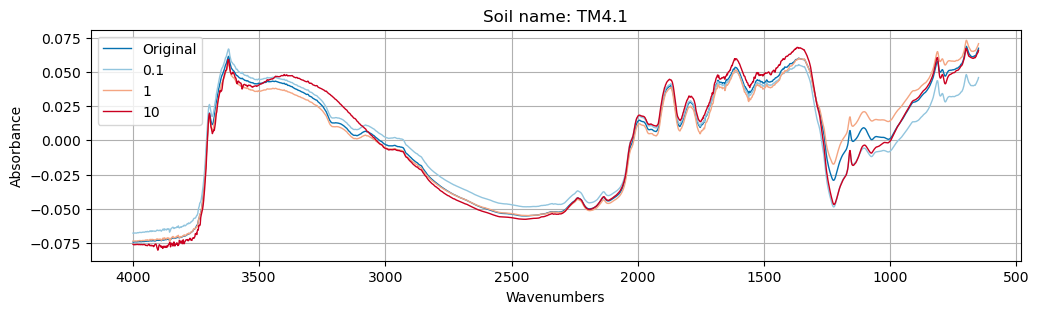

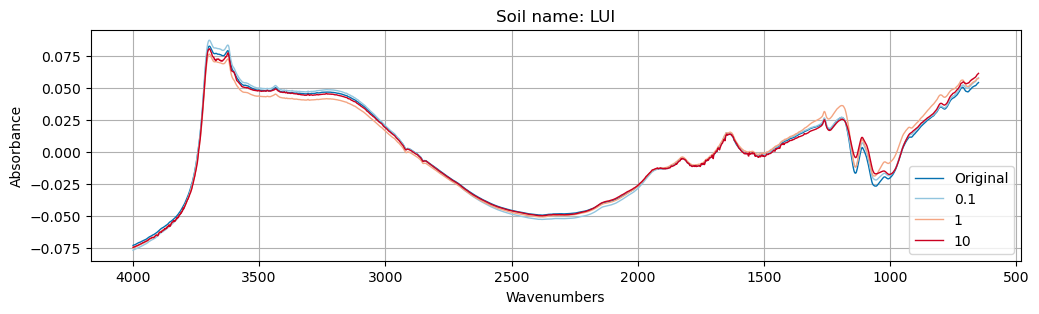

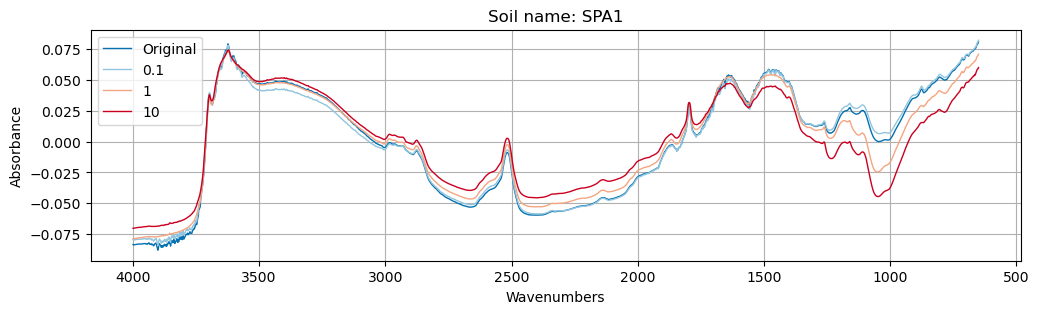

In [ ]:
spectra_type = 'MIR'
X, wavenumbers, names, ascending = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names))
    ])
    
    plot_spectra(pipe.fit_transform(X), wavenumbers,
                 [deep_blue, blue, orange, red], ['Original', '0.1', '1', '10'], 
                 smp_name, figsize=(12, 3))

### NIR

In [ ]:
spectra_type = 'NIR'

X, wavenumbers, names, ascending = load_data(spectra_type)
print('X shape: ', X.shape, 'Wavenumbers shape: ', wavenumbers.shape)
print('First 10 wavenumbers: ', wavenumbers[:10])
print('First 5 names: ', names[:5])

X shape:  (24, 949) Wavenumbers shape:  (949,)
First 10 wavenumbers:  [11536 11528 11520 11512 11504 11496 11488 11480 11472 11464]
First 5 names:  ['LUI-0-0' 'LUI-0-1' 'LUI-1-0' 'LUI-1-1' 'LUI-2-0']


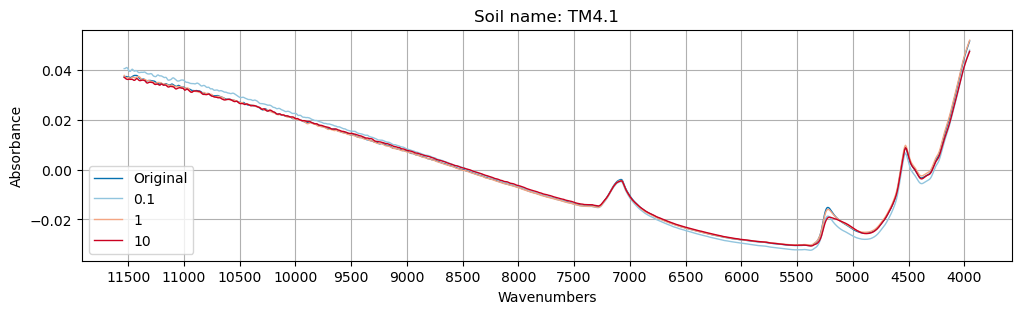

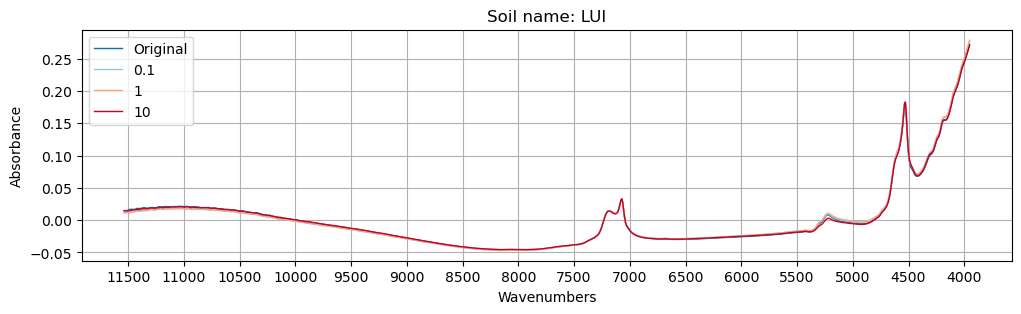

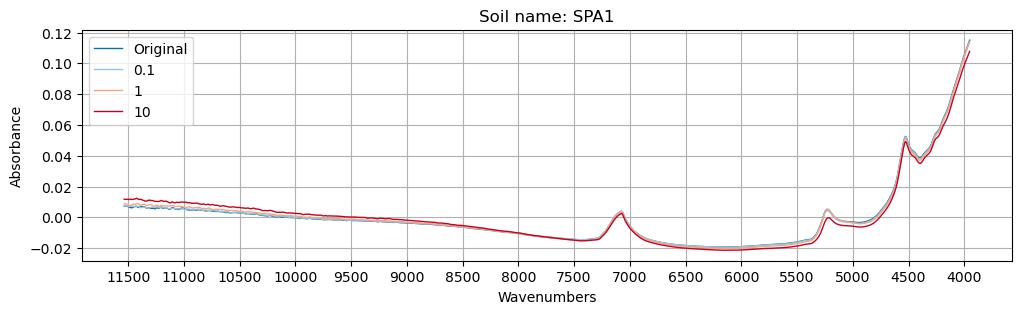

In [ ]:
for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names))
    ])
    
    plot_spectra(pipe.fit_transform(X), wavenumbers,
                 [deep_blue, blue, orange, red], ['Original', '0.1', '1', '10'], 
                 smp_name, figsize=(12, 3))

## Mean replicates without baseline & noise

### MIR

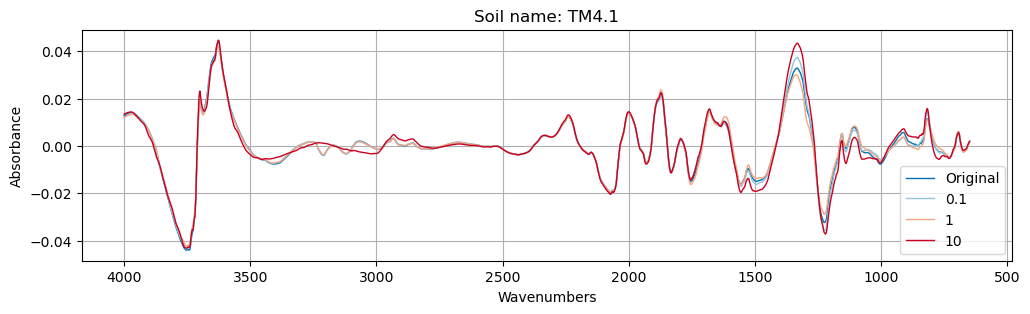

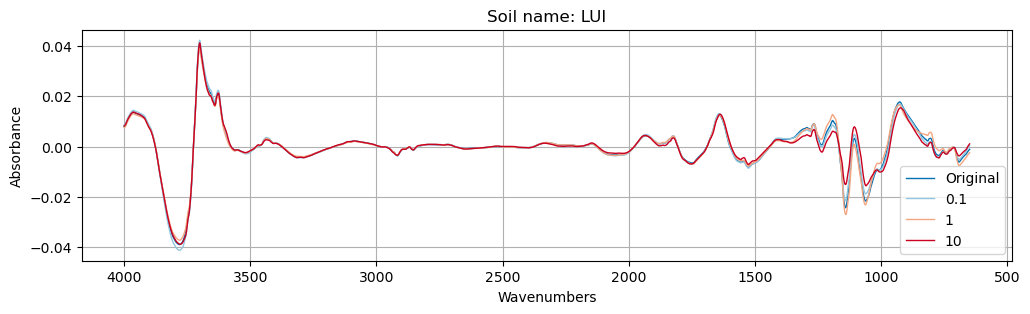

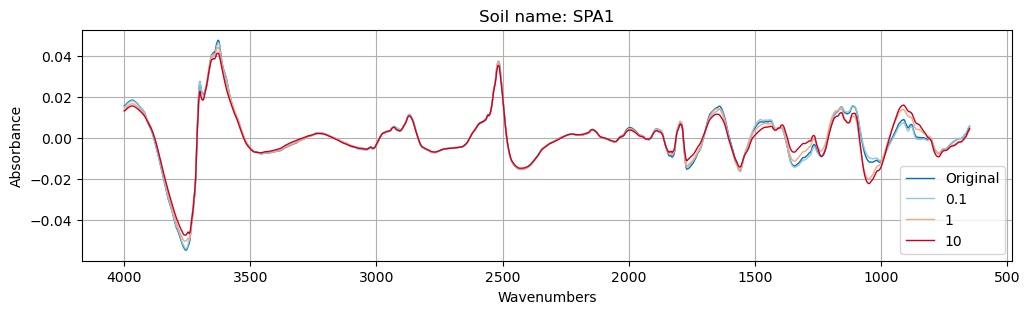

In [ ]:
spectra_type = 'MIR'

X, wavenumbers, names, ascending = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(filtered_levels=[0, -1, -2, -3]))
    ])
    
    X_sample = pipe.fit_transform(X)
    plot_spectra(pipe.fit_transform(X), wavenumbers,
                 [deep_blue, blue, orange, red], ['Original', '0.1', '1', '10'], 
                 smp_name, figsize=(12, 3))

### NIR

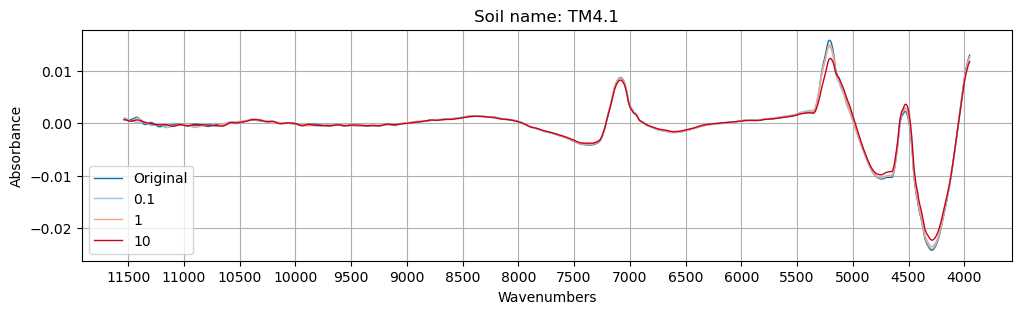

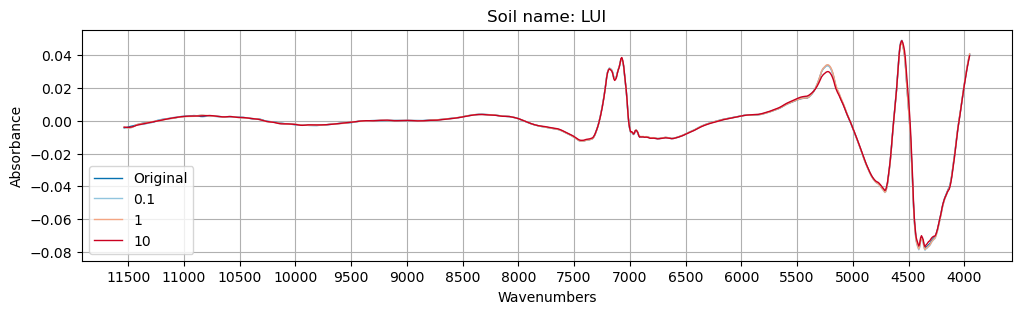

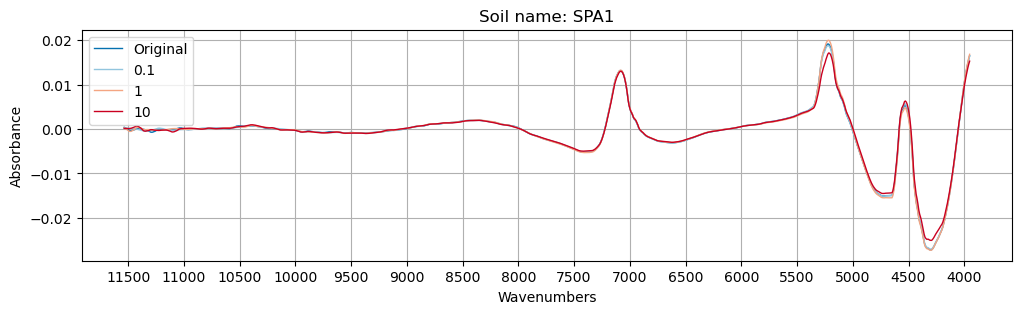

In [ ]:
spectra_type = 'NIR'
X, wavenumbers, names, ascending = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(filtered_levels=[0, -1, -2, -3]))
    ])
    
    X_sample = pipe.fit_transform(X)
    plot_spectra(pipe.fit_transform(X), wavenumbers,
                 [deep_blue, blue, orange, red], ['Original', '0.1', '1', '10'], 
                 smp_name, figsize=(12, 3))

## Differences without baseline and noise

### MIR

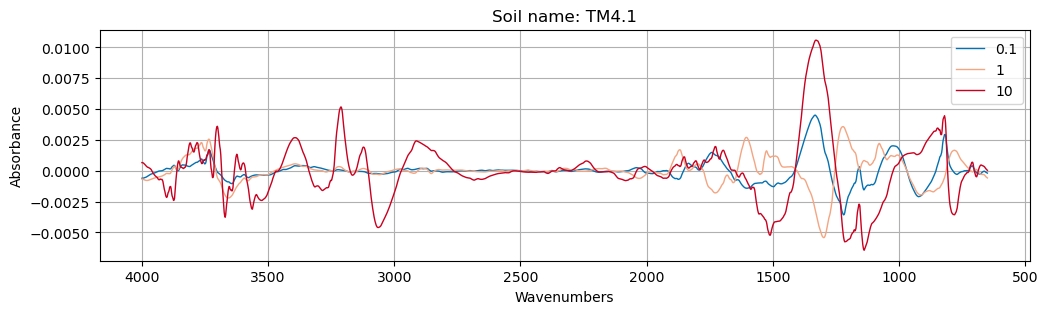

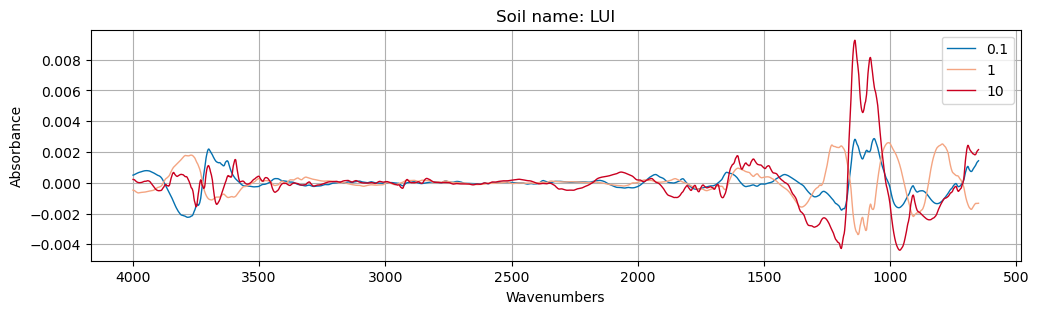

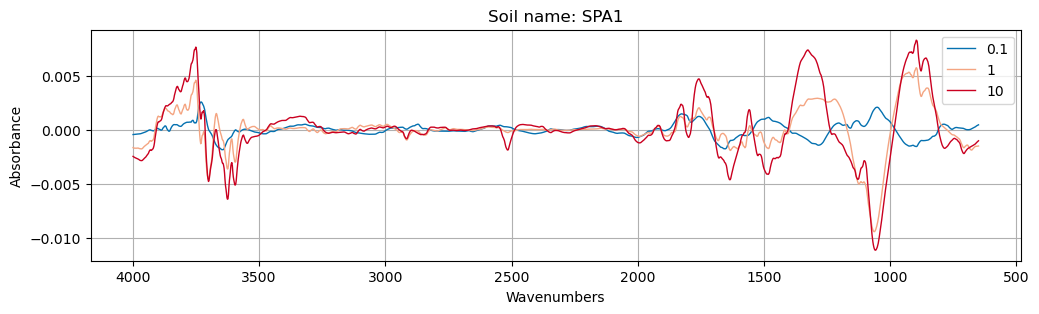

In [ ]:
spectra_type = 'MIR'
X, wavenumbers, names, ascending = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(filtered_levels=[0, -1, -2, -3])),
        ('Difference from non manipulated soil', DiffFromUnspiked())
    ])
    
    X_sample = pipe.fit_transform(X)
    plot_spectra(X_sample, wavenumbers,[deep_blue, orange, red], 
                 ['0.1', '1', '10'], smp_name, figsize=(12,3))

### NIR

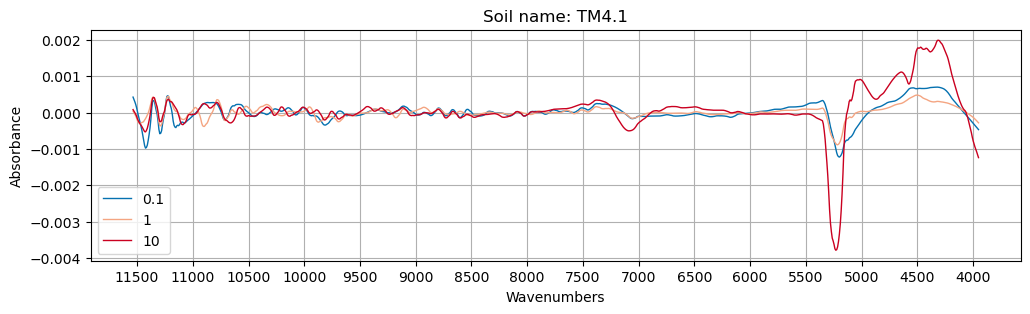

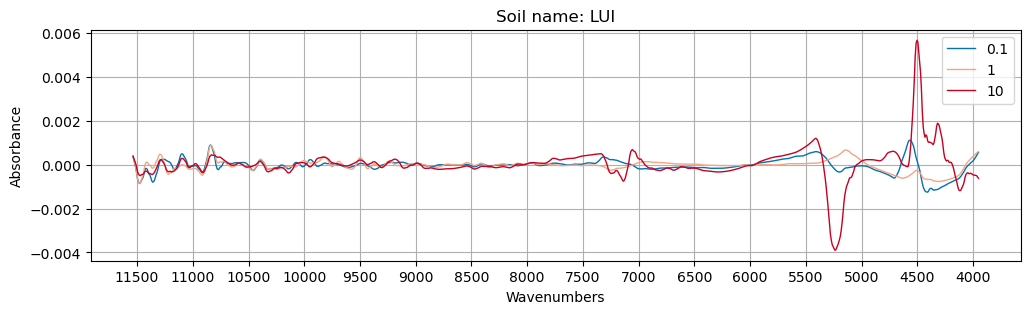

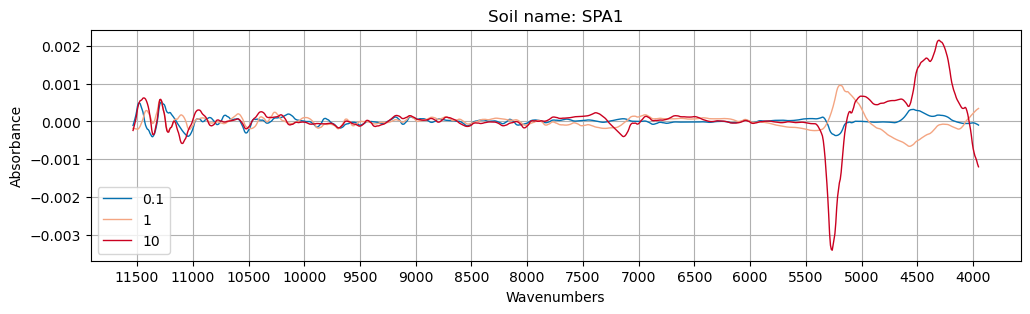

In [ ]:
spectra_type = 'NIR'
X, wavenumbers, names, ascending = load_data(spectra_type)

for smp_name in ['TM4.1', 'LUI', 'SPA1']:
    pipe = Pipeline([
        ('mean center replicates', MeanReplicates(smp_name, names)),
        ('DWT filtering', DWTFiltering(filtered_levels=[0, -1, -2, -3])),
        ('Difference from non manipulated soil', DiffFromUnspiked())
    ])
    
    X_sample = pipe.fit_transform(X)
    plot_spectra(X_sample, wavenumbers,[deep_blue, orange, red], 
                 ['0.1', '1', '10'], smp_name, figsize=(12,3))

In [ ]:
# TBD
#import matplotlib.pyplot as plt
#import numpy as np

# Assume you have a figure and an axes object
#fig, ax = plt.subplots()

# Set the x-ticks
#xticks = np.arange(2000, 0, -500)  # adjust the values as per your requirement
#ax.set_xticks(xticks)

# Define a function to calculate the y-values based on the x-values
#def calculate_y_values(xticks):
#    y_values = []
#    for i, xtick in enumerate(xticks):
#        if i % 2 == 0:
#            y_values.append(0.1)  # adjust the value as per your requirement
#        else:
#            y_values.append(0.2)  # adjust the value as per your requirement
#    return y_values

# Calculate the y-values
#y_values = calculate_y_values(xticks)

# Set the x-tick labels with different y-values
#for xtick, y_value in zip(xticks, y_values):
#    ax.text(xtick, y_value, str(xtick), ha='center')

# Hide the original x-tick labels
#ax.set_xticklabels([])

# Show the plot
#plt.show()